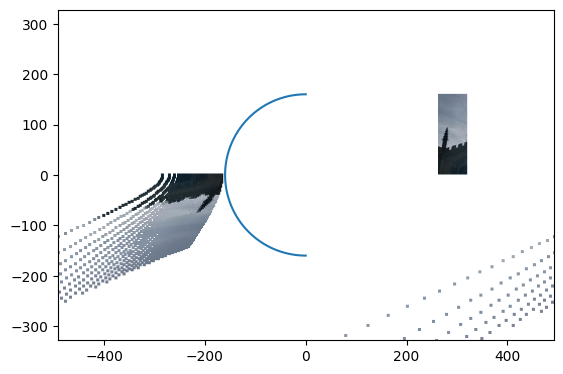

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint

#Everything before "image = plt.imread(image)" is just on ellas request, before we actually submit it would be replaced
choice = input("Tall (T) or Wide (W)")
while choice.upper() != "T" and choice.upper() != "W":
    choice = input("Tall (T) or Wide (W)")
if choice.upper() == "T":
    ella_hugo_BOSS_ulbrich = randint(1,22)
    if ella_hugo_BOSS_ulbrich == 7:
        image = "Tall2.jpg"
        #Thales: 80 wide, 134 high
    else:
        image = "Tall1.jpg"
        #Ella: 80 wide, 155 high
else:
    image = "aWide.jpg"
    #164 wide, 80 high

image = plt.imread(image)
size = max(image.shape[0], image.shape[1]) * 2
canvas = np.zeros((size, int(size * 1.5), image.shape[2]), dtype=np.uint8)
canvas += 255
rad = int(2*image.shape[0])
start_x = int(0.8 * image.shape[1])
start_y = int(-1 * image.shape[0])

for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        colour = image[y, x]
        old_x = x + start_x
        old_y = y + start_y

        denominator = rad**2 - old_x**2
        if denominator <= 0:
            continue
        theta = np.arctan(old_y / denominator**0.5)
        m = np.tan(2 * theta)

        numerator_part = (rad**2 - old_y**2)**0.5
        if numerator_part <= 0:
            continue
        numerator2 = -(m * numerator_part - old_y)
        denominator2 = (old_y / old_x) + m

        if denominator2 == 0:
            new_x = old_x*(-2*rad+denominator)/(2*old_x+denominator)
        else:
            new_x = int(numerator2 / denominator2)
        new_y = int(new_x * old_y / old_x)

        try:
            canvas[(size // 2) + old_y, (3 * size // 4) + old_x] = colour
        except:
            pass

        for dy in range(-1, 2):
            for dx in range(-1, 2):
                try:
                    canvas[(size//2)+new_y+dy, (3*size//4)+new_x+dx] = colour
                except:
                    continue

def generate_semicircle(center_x, center_y, radius, stepsize=0.1):
    x = np.arange(center_x, center_x+radius+stepsize, stepsize)
    y = np.sqrt(radius**2 - x**2)

    x = np.concatenate([x,x[::-1]])
    y = np.concatenate([y,-y[::-1]])

    return -x, y + center_y

x, y = generate_semicircle(0, 0, rad)
plt.imshow(canvas, extent=[-size * 1.5, size * 1.5, -size, size])
plt.xlim(-size * 1.5, size * 1.5)
plt.ylim(-size, size)
plt.plot(x,y)
plt.show()